In [1]:
using Base.Threads
using Distributions
using HypothesisTests
using Random
using StatsBase
using StatsFuns
using StatsPlots
default(fmt=:png, titlefontsize=10, guidefontsize=8, tickfontsize=6)

In [53]:
function sim(TestFunc = MannWhitneyUTest;
        distx = Normal(0, 1), disty = Normal(0, 4), m = 100, n = 50,
        L = 10^6)
    pval = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    @threads for i in 1:L
        X = rand!(distx, tmpX[threadid()])
        Y = rand!(disty, tmpY[threadid()])
        pval[i] = pvalue(TestFunc(X, Y))
    end
    pval
    ecdf(pval)
end

distname(dist) = replace(string(dist), r"\{[^\}]*\}"=>"")

function plot_ecdf(ecdf_pval, TestFunc, distx, disty, m, n; kwargs...)
    plot(p -> ecdf_pval(p), 0, 0.1; label="ecdf of P-values")
    plot!([0, 0.1], [0, 0.1]; label="", ls=:dot, c=:black)
    plot!(legend=:topleft)
    plot!(xtick=0:0.01:0.1, ytick=0:0.01:0.2)
    plot!(xguide="nominal significance level α", 
        yguide="probability of P-value < α")
    title!("$TestFunc\n\
        X: $(distname(distx)), m=$m\n\
        Y: $(distname(disty)), n=$n")
    plot!(size=(400, 450))
    plot!(; kwargs...)
end

function plot_pvals(
        TestFunc1 = MannWhitneyUTest,
        TestFunc2 = UnequalVarianceTTest;
        distx = Normal(0, 1), disty = Normal(0, 4), m = 100, n = 50,
        L = 10^6, kwargs...)
    
    ecdf_pval1 = @time sim(TestFunc1;
        distx = distx - median(distx),
        disty = disty - median(disty),
        m, n, L, kwargs...)
    ymax1 = ecdf_pval1(0.1)
    ecdf_pval2 = @time sim(TestFunc2;
        distx = distx - mean(distx),
        disty = disty - mean(disty),
        m, n, L, kwargs...)
    ymax2 = ecdf_pval2(0.1)
    ymax = max(ymax1, ymax2)
    P1 = plot_ecdf(ecdf_pval1, TestFunc1, distx, disty, m, n;
        ylim=(-0.002, 1.02*ymax), kwargs...)
    P2 = plot_ecdf(ecdf_pval2, TestFunc2, distx, disty, m, n;
        ylim=(-0.002, 1.02*ymax), kwargs...)
    plot(P1, P2; size=(800, 430))
end

plot_pvals (generic function with 3 methods)

## 正規分布

  1.409971 seconds (7.03 M allocations: 1.961 GiB, 31.69% gc time, 4.18% compilation time)
  0.408802 seconds (9.07 M allocations: 211.219 MiB, 20.67% compilation time)


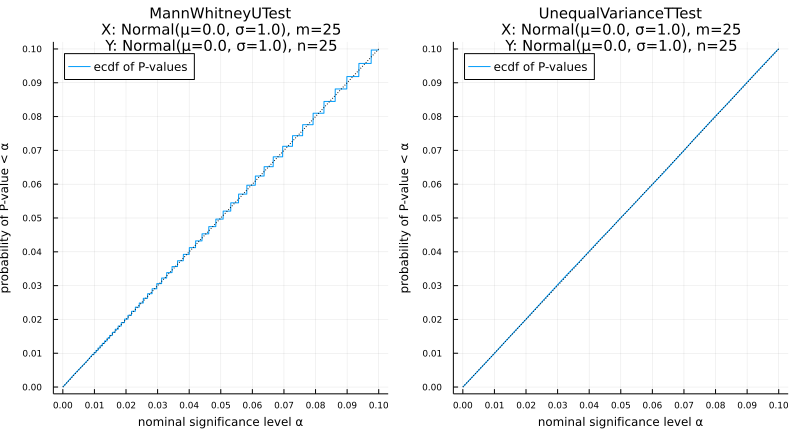

In [54]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 1), m = 25, n = 25)

  1.665834 seconds (7.00 M allocations: 2.690 GiB, 44.98% gc time)
  0.327659 seconds (9.00 M allocations: 206.011 MiB)


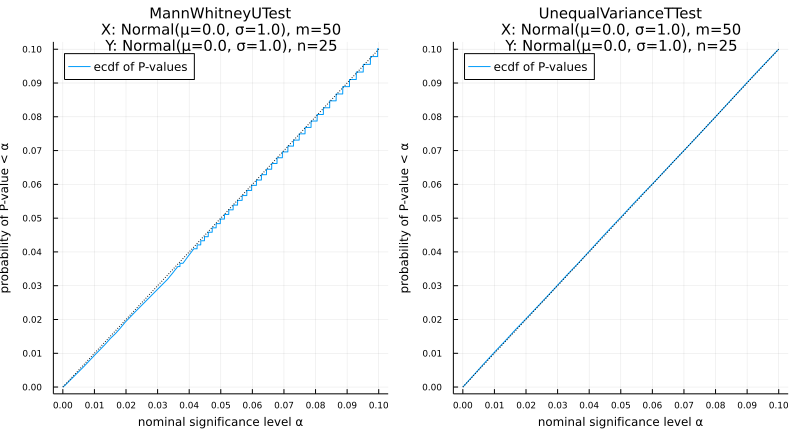

In [55]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 1), m = 50, n = 25)

  0.102898 seconds (700.10 k allocations: 200.667 MiB)
  0.027382 seconds (899.59 k allocations: 20.605 MiB)


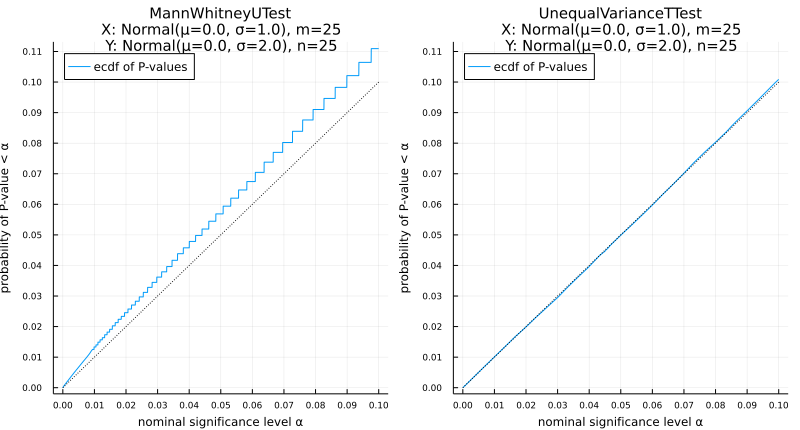

In [46]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 2), m = 25, n = 25)

  0.111194 seconds (700.11 k allocations: 275.438 MiB)
  0.032437 seconds (899.60 k allocations: 20.608 MiB)


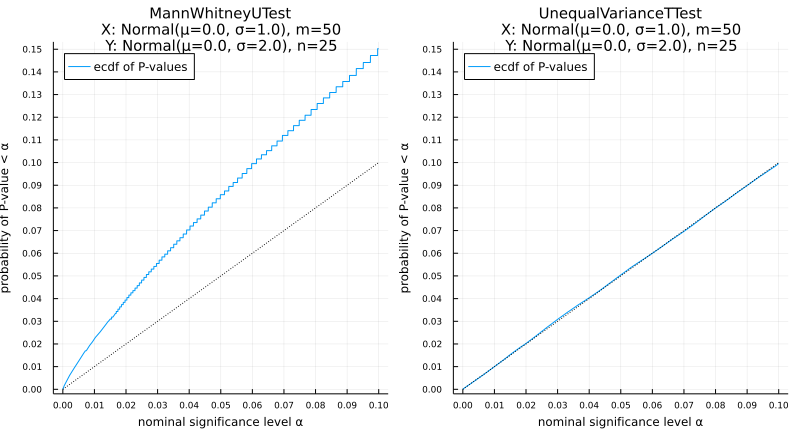

In [47]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 2), m = 50, n = 25)

  0.217636 seconds (700.11 k allocations: 101.482 MiB, 81.30% gc time)
  0.025745 seconds (899.60 k allocations: 20.603 MiB)


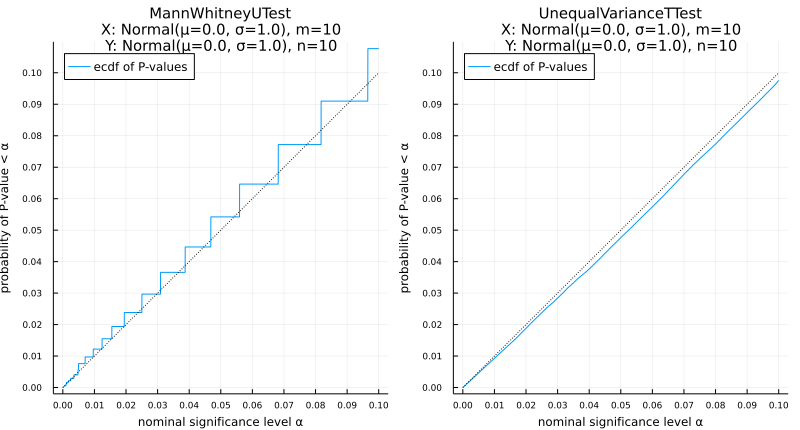

In [48]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 1), m = 10, n = 10)

  0.071675 seconds (700.10 k allocations: 132.001 MiB)
  0.025998 seconds (899.70 k allocations: 20.613 MiB)


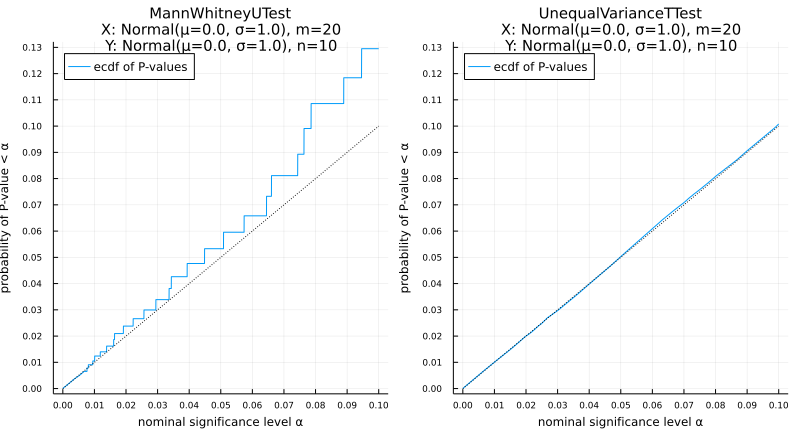

In [49]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 1), m = 20, n = 10)

  0.054346 seconds (700.11 k allocations: 101.482 MiB)
  0.036280 seconds (899.59 k allocations: 20.603 MiB)


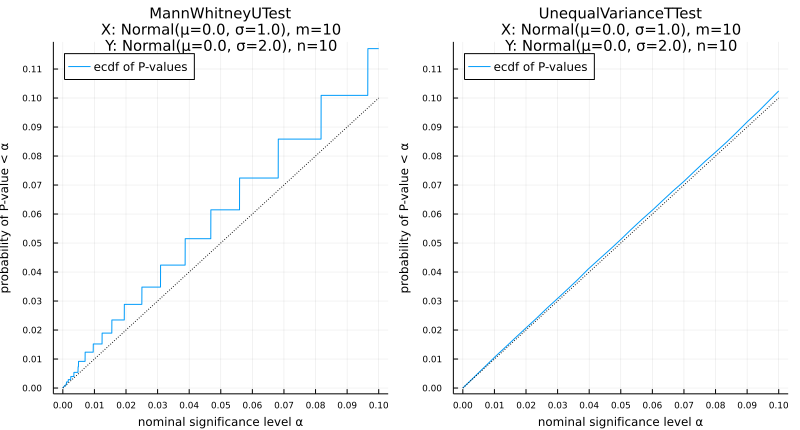

In [50]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10)

  0.068689 seconds (700.10 k allocations: 132.001 MiB)
  0.025703 seconds (899.59 k allocations: 20.604 MiB)


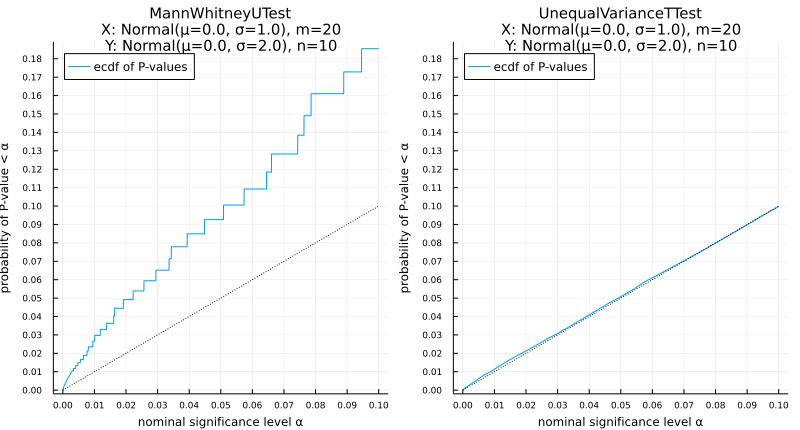

In [51]:
plot_pvals(distx = Normal(0, 1), disty = Normal(0, 2), m = 20, n = 10)

## ガンマ分布

  1.656780 seconds (7.02 M allocations: 1.961 GiB, 30.75% gc time, 2.65% compilation time)
  0.749279 seconds (9.07 M allocations: 211.224 MiB, 6.68% gc time, 14.61% compilation time)


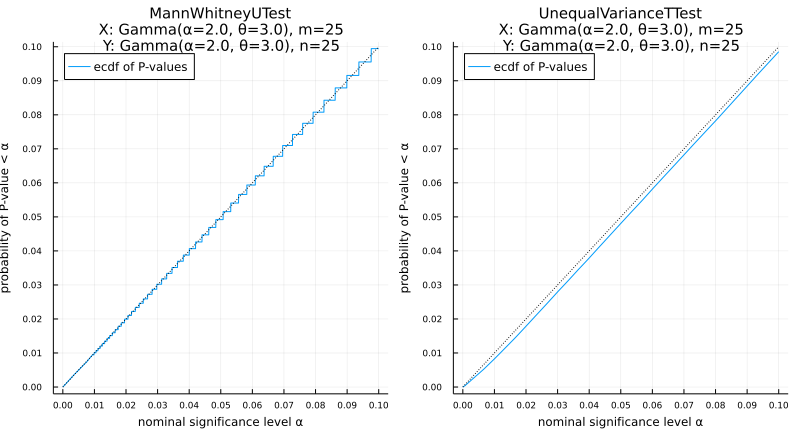

In [56]:
plot_pvals(distx = Gamma(2, 3), disty = Gamma(2, 3), m = 25, n = 25)

  2.124907 seconds (7.00 M allocations: 2.690 GiB, 33.75% gc time)
  0.845026 seconds (9.00 M allocations: 206.011 MiB)


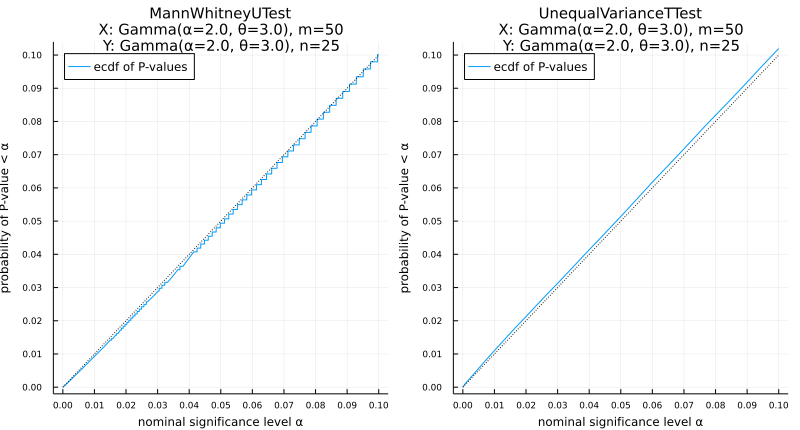

In [57]:
plot_pvals(distx = Gamma(2, 3), disty = Gamma(2, 3), m = 50, n = 25)

  1.517840 seconds (7.00 M allocations: 1.960 GiB, 27.62% gc time)
  0.560404 seconds (9.00 M allocations: 206.008 MiB)


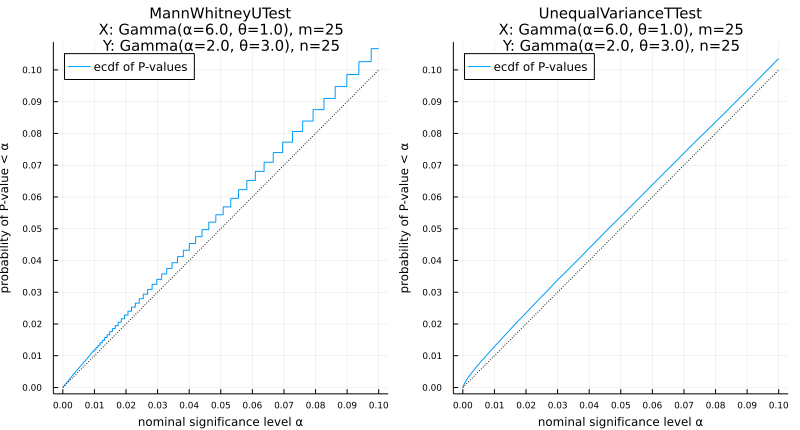

In [58]:
plot_pvals(distx = Gamma(6, 1), disty = Gamma(2, 3), m = 25, n = 25)

  1.759759 seconds (7.00 M allocations: 2.690 GiB, 32.89% gc time)
  0.694788 seconds (9.00 M allocations: 206.011 MiB)


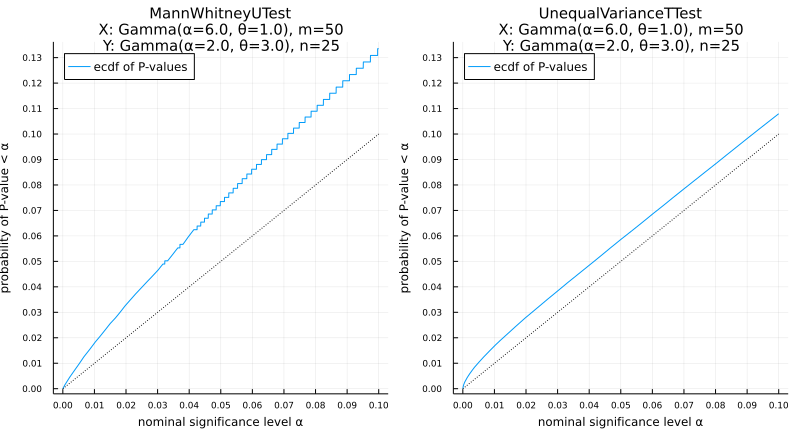

In [59]:
plot_pvals(distx = Gamma(6, 1), disty = Gamma(2, 3), m = 50, n = 25)

  0.798018 seconds (7.00 M allocations: 1014.722 MiB, 34.91% gc time)
  0.401829 seconds (9.00 M allocations: 206.006 MiB)


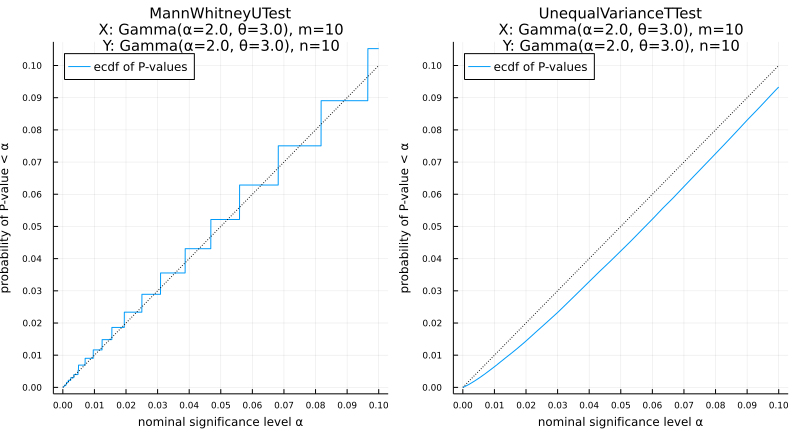

In [60]:
plot_pvals(distx = Gamma(2, 3), disty = Gamma(2, 3), m = 10, n = 10)

  0.936461 seconds (7.00 M allocations: 1.289 GiB, 26.36% gc time)
  0.630474 seconds (9.00 M allocations: 206.007 MiB, 24.05% gc time)


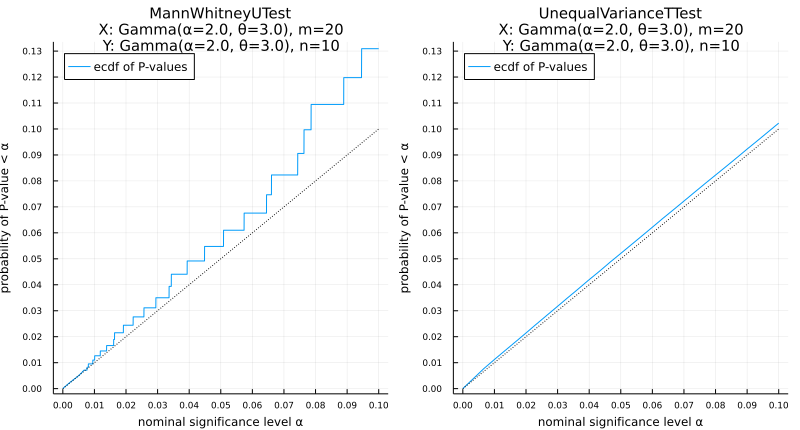

In [61]:
plot_pvals(distx = Gamma(2, 3), disty = Gamma(2, 3), m = 20, n = 10)

  0.617307 seconds (7.00 M allocations: 1014.722 MiB, 19.09% gc time)
  0.511434 seconds (9.00 M allocations: 206.006 MiB, 22.54% gc time)


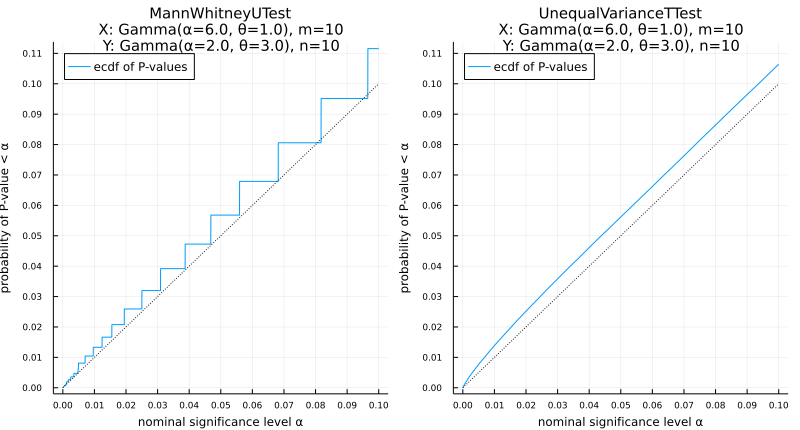

In [62]:
plot_pvals(distx = Gamma(6, 1), disty = Gamma(2, 3), m = 10, n = 10)

  1.012559 seconds (7.00 M allocations: 1.289 GiB, 33.49% gc time)
  0.445735 seconds (9.00 M allocations: 206.007 MiB)


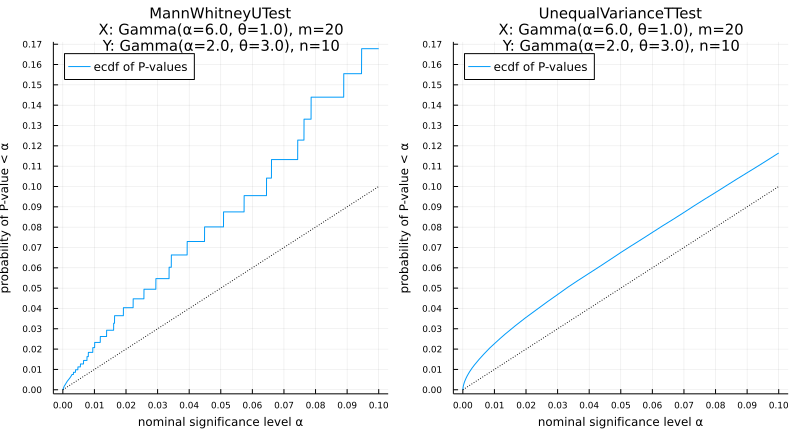

In [63]:
plot_pvals(distx = Gamma(6, 1), disty = Gamma(2, 3), m = 20, n = 10)

## 雑多

  0.619093 seconds (7.02 M allocations: 1015.937 MiB, 24.48% gc time, 6.90% compilation time)
  0.579782 seconds (9.07 M allocations: 211.197 MiB, 24.43% gc time, 17.99% compilation time)


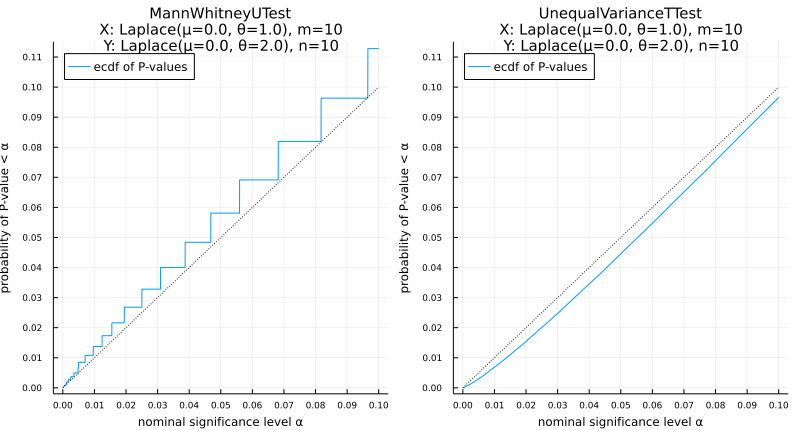

In [64]:
plot_pvals(distx = Laplace(0, 1), disty = Laplace(0, 2), m = 10, n = 10)

  1.221900 seconds (7.00 M allocations: 1.960 GiB, 27.79% gc time)
  0.549353 seconds (9.00 M allocations: 206.009 MiB, 24.37% gc time)


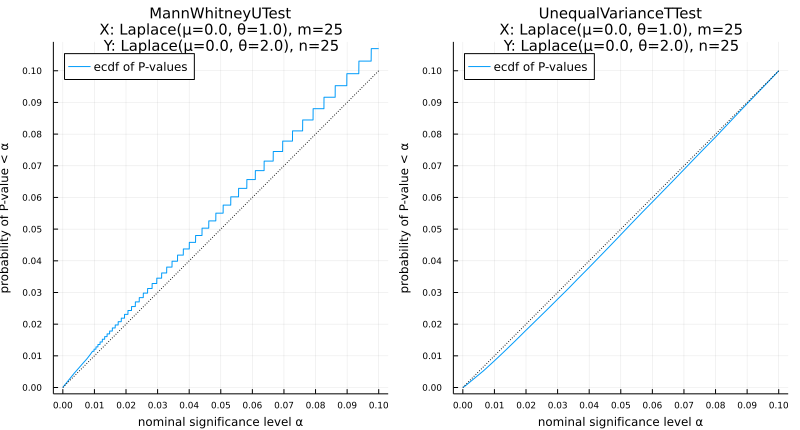

In [66]:
plot_pvals(distx = Laplace(0, 1), disty = Laplace(0, 2), m = 25, n = 25)

  2.040167 seconds (7.00 M allocations: 3.539 GiB, 42.58% gc time)
  0.418664 seconds (9.00 M allocations: 206.014 MiB)


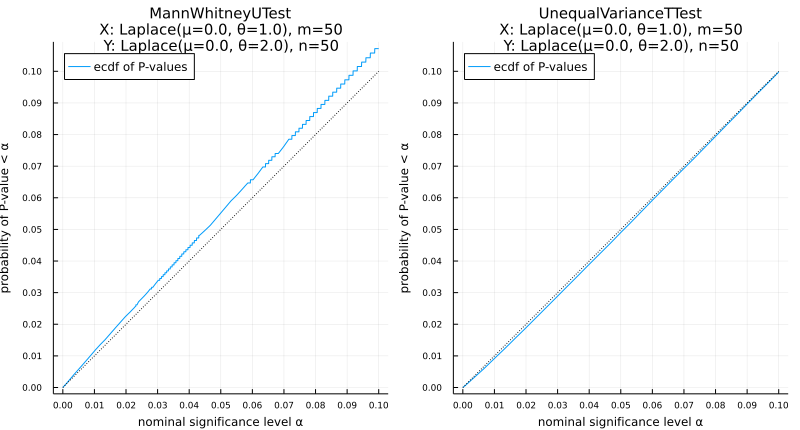

In [67]:
plot_pvals(distx = Laplace(0, 1), disty = Laplace(0, 2), m = 50, n = 50)

  0.766300 seconds (7.00 M allocations: 1.289 GiB, 31.99% gc time)
  0.490310 seconds (9.00 M allocations: 206.007 MiB, 33.08% gc time)


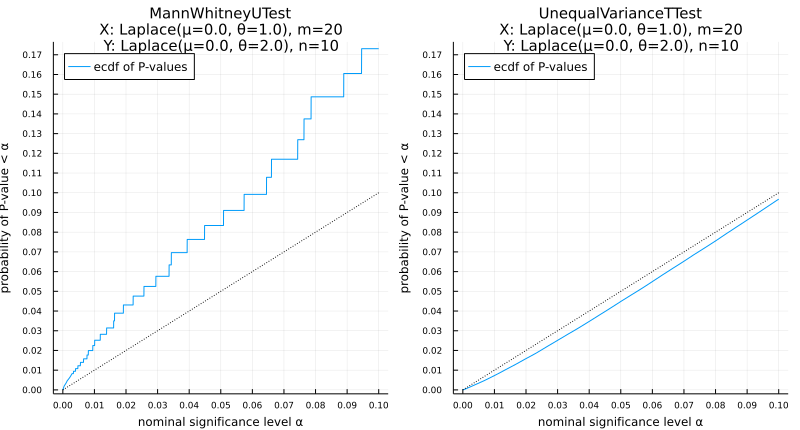

In [68]:
plot_pvals(distx = Laplace(0, 1), disty = Laplace(0, 2), m = 20, n = 10)

  1.438707 seconds (7.00 M allocations: 2.690 GiB, 37.16% gc time)
  0.664797 seconds (9.00 M allocations: 206.011 MiB, 24.03% gc time)


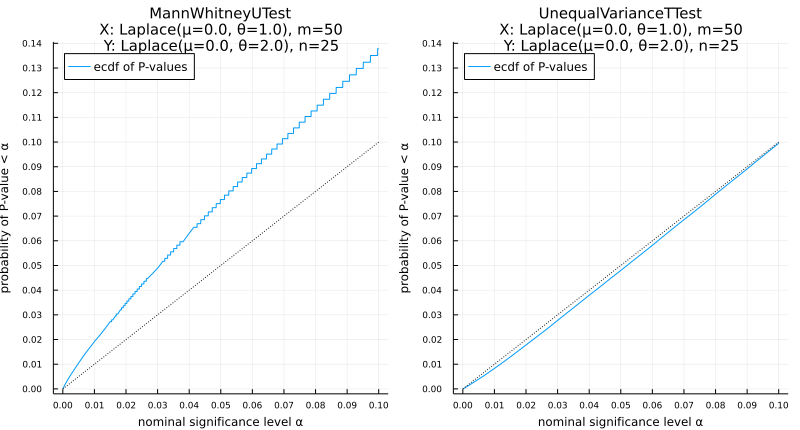

In [69]:
plot_pvals(distx = Laplace(0, 1), disty = Laplace(0, 2), m = 50, n = 25)

  0.554603 seconds (7.02 M allocations: 1015.803 MiB, 23.52% gc time, 7.25% compilation time)
  0.526366 seconds (9.07 M allocations: 211.049 MiB, 29.61% gc time, 14.66% compilation time)


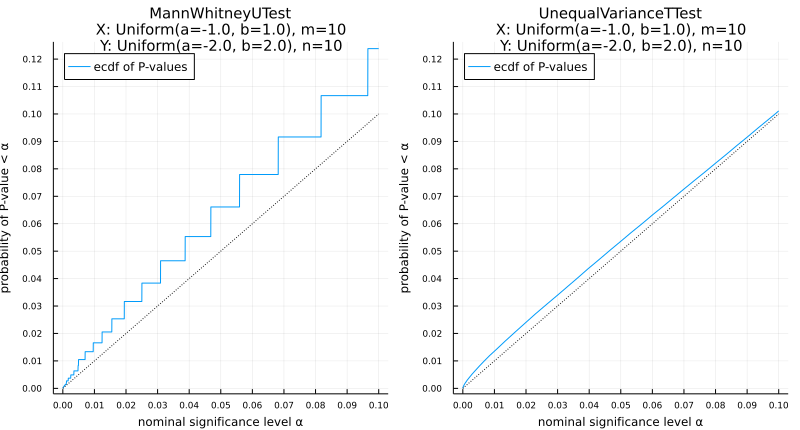

In [70]:
plot_pvals(distx = Uniform(-1, 1), disty = Uniform(-2, 2), m = 10, n = 10)

  0.765353 seconds (7.00 M allocations: 1.289 GiB, 34.33% gc time)
  0.273590 seconds (9.00 M allocations: 206.007 MiB)


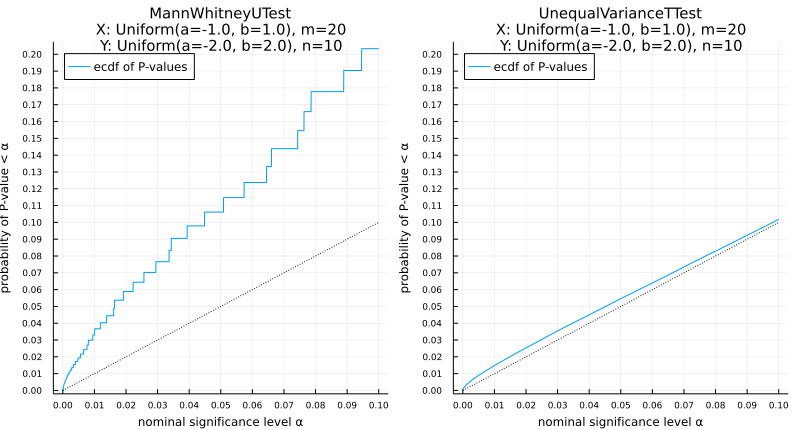

In [71]:
plot_pvals(distx = Uniform(-1, 1), disty = Uniform(-2, 2), m = 20, n = 10)

  1.367912 seconds (7.00 M allocations: 2.690 GiB, 40.06% gc time)
  0.472397 seconds (9.00 M allocations: 206.011 MiB, 36.04% gc time)


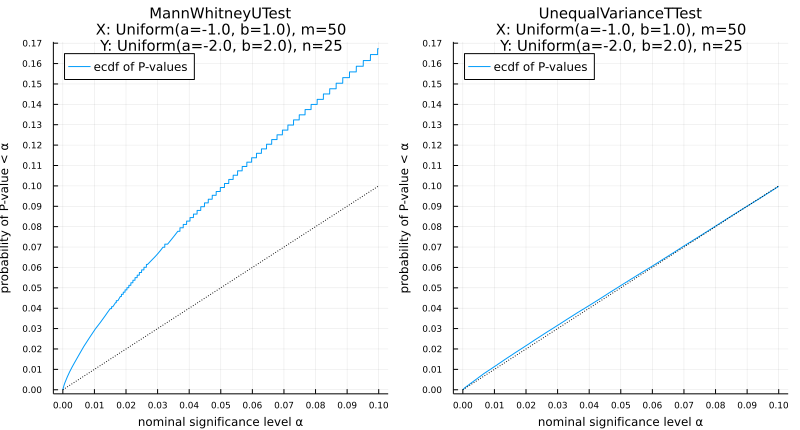

In [72]:
plot_pvals(distx = Uniform(-1, 1), disty = Uniform(-2, 2), m = 50, n = 25)

In [32]:
@doc LogNormal

```
LogNormal(μ,σ)
```

The *log normal distribution* is the distribution of the exponential of a [`Normal`](@ref) variate: if $X \sim \operatorname{Normal}(\mu, \sigma)$ then $\exp(X) \sim \operatorname{LogNormal}(\mu,\sigma)$. The probability density function is

$$
f(x; \mu, \sigma) = \frac{1}{x \sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(\log(x) - \mu)^2}{2 \sigma^2} \right),
\quad x > 0
$$

```julia
LogNormal()          # Log-normal distribution with zero log-mean and unit scale
LogNormal(μ)         # Log-normal distribution with log-mean mu and unit scale
LogNormal(μ, σ)      # Log-normal distribution with log-mean mu and scale sig

params(d)            # Get the parameters, i.e. (μ, σ)
meanlogx(d)          # Get the mean of log(X), i.e. μ
varlogx(d)           # Get the variance of log(X), i.e. σ^2
stdlogx(d)           # Get the standard deviation of log(X), i.e. σ
```

External links

  * [Log normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Log-normal_distribution)


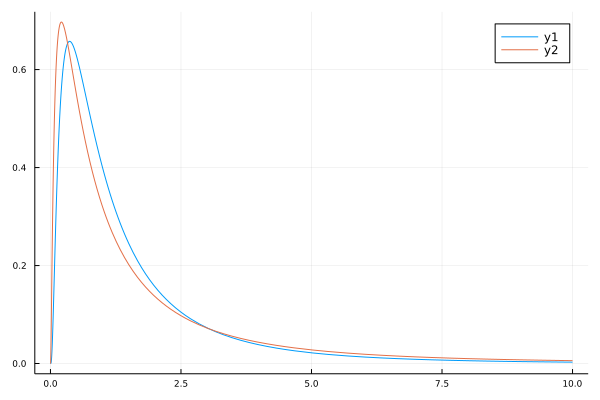

In [33]:
plot(LogNormal(0, 1), 0, 10)
plot!(LogNormal(0, 1.25), 0, 10)

In [34]:
std(LogNormal(0, 1)), std(LogNormal(0, 1.25))

(2.1611974158950877, 4.241363213821604)

  1.506663 seconds (700.11 k allocations: 3.057 GiB, 34.56% gc time)
  0.255882 seconds (899.69 k allocations: 20.704 MiB)


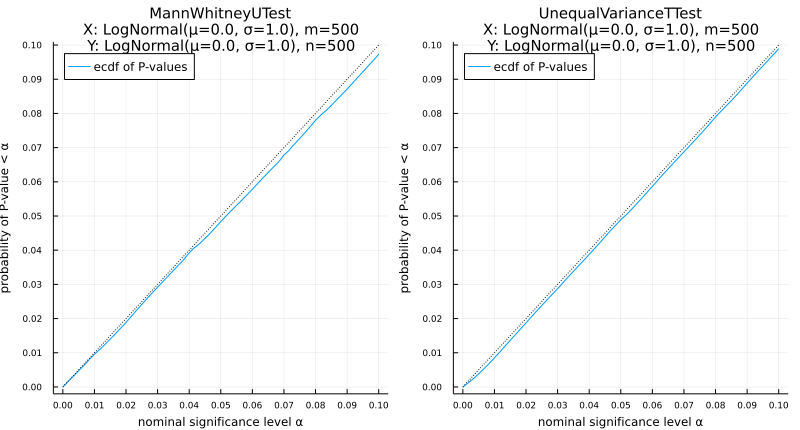

In [75]:
plot_pvals(distx = LogNormal(0, 1), disty = LogNormal(0, 1), m = 500, n = 500, L=10^5)

  1.490563 seconds (700.10 k allocations: 3.057 GiB, 33.68% gc time)
  0.244170 seconds (899.69 k allocations: 20.704 MiB)


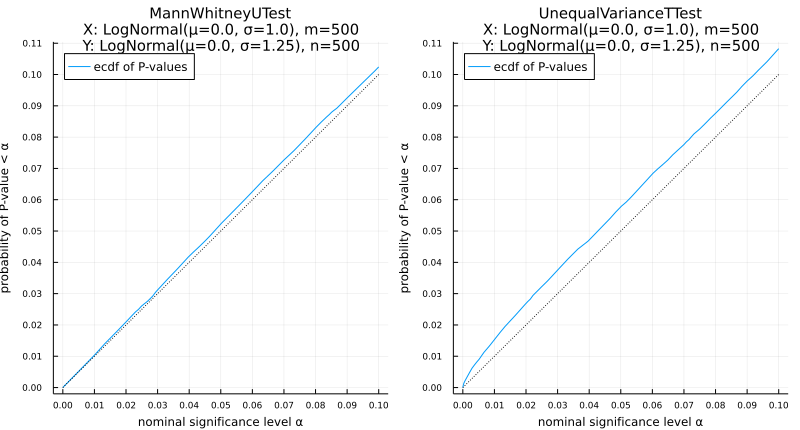

In [76]:
plot_pvals(distx = LogNormal(0, 1), disty = LogNormal(0, 1.25), m = 500, n = 500, L=10^5)

  2.187321 seconds (700.11 k allocations: 4.553 GiB, 29.33% gc time)
  0.365292 seconds (899.69 k allocations: 20.749 MiB)


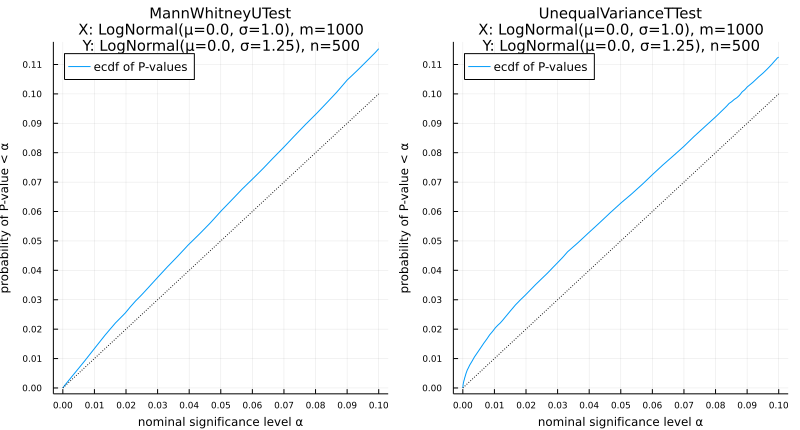

In [77]:
plot_pvals(distx = LogNormal(0, 1), disty = LogNormal(0, 1.25), m = 1000, n = 500, L=10^5)

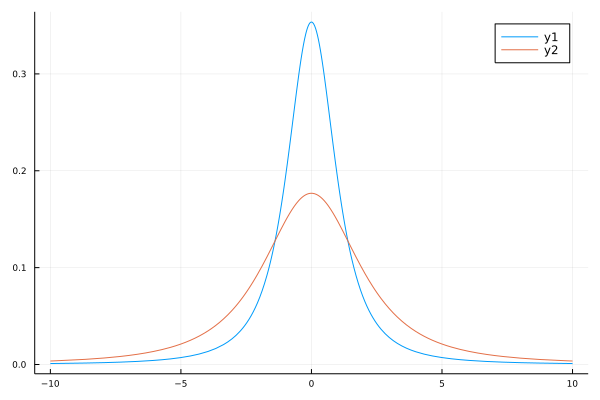

In [38]:
plot(TDist(2), -10, 10)
plot!(2TDist(2), -10, 10)

In [39]:
var(TDist(2)), var(TDist(3)), var(TDist(4)), var(TDist(5))

(Inf, 3.0, 2.0, 1.6666666666666667)

  4.658121 seconds (7.02 M allocations: 6.833 GiB, 38.59% gc time, 1.01% compilation time)
  1.107596 seconds (9.07 M allocations: 211.238 MiB, 8.80% compilation time)


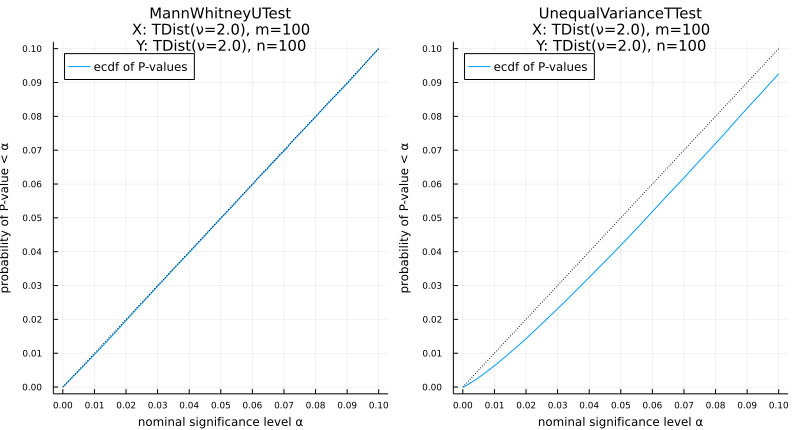

In [78]:
plot_pvals(distx = TDist(2), disty = TDist(2), m = 100, n = 100)

  5.351064 seconds (7.00 M allocations: 9.783 GiB, 37.17% gc time)
  1.613677 seconds (9.00 M allocations: 206.025 MiB, 13.48% gc time)


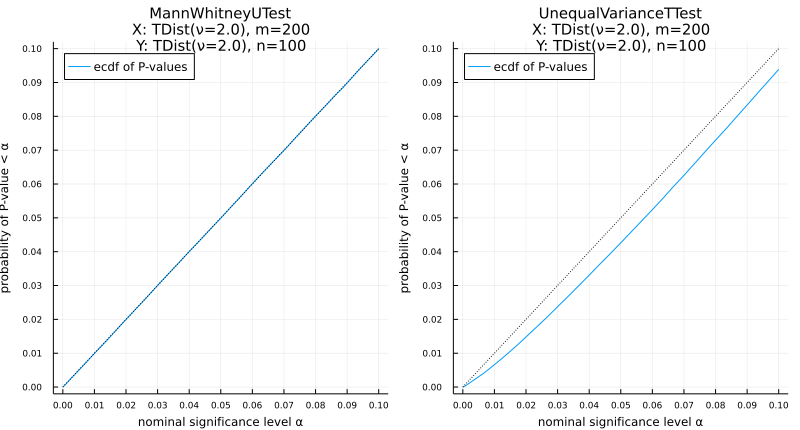

In [79]:
plot_pvals(distx = TDist(2), disty = TDist(2), m = 200, n = 100)

  4.446458 seconds (7.00 M allocations: 6.832 GiB, 43.38% gc time)
  1.038899 seconds (9.00 M allocations: 206.023 MiB, 3.05% gc time)


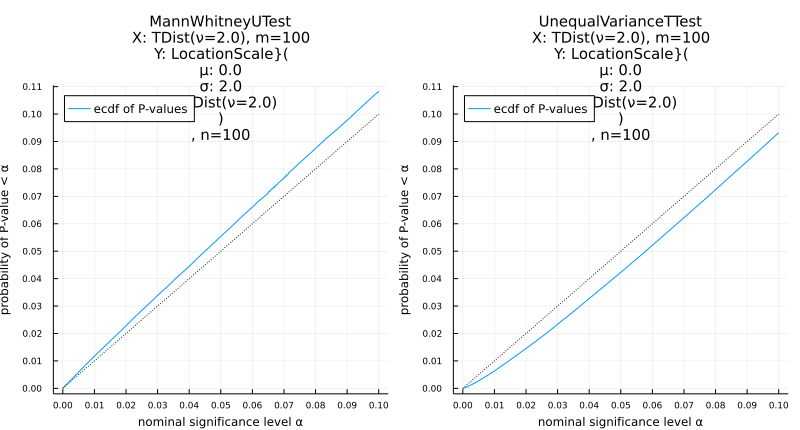

In [80]:
plot_pvals(distx = TDist(2), disty = 2TDist(2), m = 100, n = 100)

  4.792792 seconds (7.00 M allocations: 9.783 GiB, 29.96% gc time)
  1.408981 seconds (9.00 M allocations: 206.034 MiB)


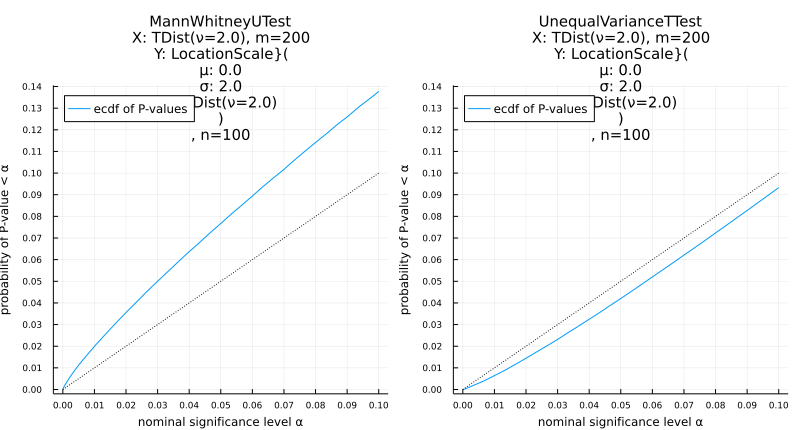

In [81]:
plot_pvals(distx = TDist(2), disty = 2TDist(2), m = 200, n = 100)